In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import platform
#sys.path.append("..")
#print(sys.path)
print(platform.system())
print(sys.version)

Darwin
3.7.2 (default, Dec 30 2018, 08:51:11) 
[Clang 8.0.0 (clang-800.0.42.1)]


# Import and Start Optimus
Use *pip install optimuspyspark* to install or *pip install --upgrade optimuspyspark* to update

In [6]:
from optimus import Optimus
op=Optimus(master="local", app_name="optimus", verbose=True)

INFO:optimus:Operative System:Darwin
INFO:optimus:Just check that Spark and all necessary environments vars are present...
INFO:optimus:-----
INFO:optimus:SPARK_HOME=/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyspark
INFO:optimus:HADOOP_HOME=/Users/JeffAtLaptop/cloudera/cdh5.1/hadoop-2.3.0-cdh5.1.2
INFO:optimus:PYSPARK_PYTHON=/opt/local/bin/python3
INFO:optimus:PYSPARK_DRIVER_PYTHON=jupyter
INFO:optimus:PYSPARK_SUBMIT_ARGS=--jars "file:///opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/optimus/jars/RedshiftJDBC42-1.2.16.1027.jar,file:///opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/optimus/jars/mysql-connector-java-8.0.16.jar,file:///opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/optimus/jars/ojdbc8.jar,file:///opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/optimus/jars/postgresql-42.

# Spark  
  
## Get the Spark Session

In [7]:

print(type(op))
assert(type(op) == "optimus.optimus.Optimus", "Optimus launch failed!")
op.spark

assertion is always true, perhaps remove parentheses?
assertion is always true, perhaps remove parentheses?
assertion is always true, perhaps remove parentheses?


<class 'optimus.optimus.Optimus'>


assertion is always true, perhaps remove parentheses?


## Get the Spark Context

In [8]:
op.sc

<SparkContext master=local appName=optimus>

## Get the packages loaded

In [9]:
op.packages

## Handling Spark jars, packages, and repositories
With Optimus it's easy to load jars, packages and repos. You can init optimus/spark like:

In [ ]:
op = Optimus(repositories = "myrepo", packages = "org.apache.spark:spark-avro_2.12:2.4.3", jars = "my_jar.jar", driver_class_path = "this_is_a_jar_class_path.jar", verbose=true)

# Data Management / IO

## Loading Data from a File
Optimus can load data in csv, json, parquet, and avro from a local file or URL.

In [ ]:
#csv
df = op.load.csv("../data/foo.csv")

#json
# Use a local file
df = op.load.json("../data/foo.json")

# Use a url
df = op.load.json("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.json")

# parquet
df = op.load.parquet("../data/foo.parquet")

# avro
# df = op.load.avro("../examples/data/foo.avro").table(5)

## Saving Data to a File

In [ ]:
#csv
df.save.csv("data/foo.csv")

# json
df.save.json("data/foo.json")

# parquet
df.save.parquet("data/foo.parquet")

# avro
#df.save.avro("examples/data/foo.avro")

## Database Connection
Optimus has tools to connect to databases and extract or store information. Optimus can handle reshoft, postgres, and mysql

In [ ]:
# This import is only to hide the credentials
from credentials import *

# For others databases use in db_type accepts 'oracle','mysql','redshift','postgres'

db =  op.connect(
    db_type=DB_TYPE,
    host=HOST,
    database= DATABASE,
    user= USER,
    password = PASSWORD,
    port=PORT)
    
# Show all tables names
db.tables(limit="all")

In [ ]:
# # Show a summary of every table
db.table.show("*",20)

In [ ]:
# # Get a table as dataframe
df_ = db.table_to_df("places_interest").table()

In [ ]:
# # Create new table in the database
db.df_to_table(df, "new_table")

# Dataframe Creation
Create a dataframe to passing a list of values for columns and rows.  
Unlike pandas you need to specify the column names.  
  

In [10]:

df = op.create.df(
    [
        "names",
        "height(ft)",
        "function",
        "rank",
        "weight(t)",
        "japanese name",
        "last position",
        "attributes"
    ],
    [

        ("Optim'us", 28.0, "Leader", 10, 4.3, ["Inochi", "Convoy"], "19.442735,-99.201111", [8.5344, 4300.0]),
        ("bumbl#ebéé  ", 17.5, "Espionage", 7, 2.0, ["Bumble", "Goldback"], "10.642707,-71.612534", [5.334, 2000.0]),
        ("ironhide&", 26.0, "Security", 7, 4.0, ["Roadbuster"], "37.789563,-122.400356", [7.9248, 4000.0]),
        ("Jazz", 13.0, "First Lieutenant", 8, 1.8, ["Meister"], "33.670666,-117.841553", [3.9624, 1800.0]),
        ("Megatron", None, "None", None, 5.7, ["Megatron"], None, [None, 5700.0]),
        ("Metroplex_)^$", 300.0, "Battle Station", 8, None, ["Metroflex"], None, [91.44, None]),

    ]).h_repartition(1)
df.table()

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable
Optim'us,28.0,Leader,10,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111","[8.53439998626709,⋅4300.0]"
bumbl#ebéé⋅⋅,17.5,Espionage,7,2.0,"['Bumble',⋅'Goldback']","10.642707,-71.612534","[5.334000110626221,⋅2000.0]"
ironhide&,26.0,Security,7,4.0,['Roadbuster'],"37.789563,-122.400356","[7.924799919128418,⋅4000.0]"
Jazz,13.0,First⋅Lieutenant,8,1.7999999523162842,['Meister'],"33.670666,-117.841553","[3.962399959564209,⋅1800.0]"
Megatron,None,None,None,5.699999809265137,['Megatron'],None,"[None,⋅5700.0]"
Metroplex_)^$,300.0,Battle⋅Station,8,None,['Metroflex'],None,"[91.44000244140625,⋅None]"


In [11]:
df = df\
    .rows.sort(["rank","height(ft)"])\
    .cols.lower(["names","function"])\
    .cols.remove_accents("names")\
    .cols.remove_special_chars("names")\
    .cols.trim("names")

df.table()

INFO:optimus:Using 'column_exp' to process column 'names' with function _lower
INFO:optimus:Using 'column_exp' to process column 'function' with function _lower
INFO:optimus:Using 'pandas_udf' to process column 'names' with function _remove_accents
INFO:optimus:Using 'pandas_udf' to process column 'names' with function multiple_replace
INFO:optimus:Using 'column_exp' to process column 'names' with function _trim


names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable
optimus,28.0,leader,10,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111","[8.53439998626709,⋅4300.0]"
metroplex,300.0,battle⋅station,8,None,['Metroflex'],None,"[91.44000244140625,⋅None]"
jazz,13.0,first⋅lieutenant,8,1.7999999523162842,['Meister'],"33.670666,-117.841553","[3.962399959564209,⋅1800.0]"
ironhide,26.0,security,7,4.0,['Roadbuster'],"37.789563,-122.400356","[7.924799919128418,⋅4000.0]"
bumblebee,17.5,espionage,7,2.0,"['Bumble',⋅'Goldback']","10.642707,-71.612534","[5.334000110626221,⋅2000.0]"
megatron,None,none,None,5.699999809265137,['Megatron'],None,"[None,⋅5700.0]"


Creating a dataframe by passing a list of tuples specifyng the column data type. You can specify a data type in string format or a Spark Datatypes. https://spark.apache.org/docs/2.3.1/api/java/org/apache/spark/sql/types/package-summary.html

Also you can use some Optimus predefined types:  
"str" = StringType()  
"int" = IntegerType()  
"float" = FloatType()  
"bool" = BoleanType()  

In [12]:
df2 = op.create.df(
    [
        ("names", "str"),
        ("height", "float"),
        ("function", "str"),
        ("rank", "int"),
    ],
    [
        ("bumblebéé  ", 17.5, "Espionage", 7),
        ("Optimus", 28.0, "Leader", 10),
        ("ironhides", 26.0, "Security", 7),
        ("Jazz", 13.0, "First Lieutenant", 8),
        ("Megatron", None, "None", None),

    ])
df2.table()

names 1 (string) nullable,height 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable
bumblebéé⋅⋅,17.5,Espionage,7
Optimus,28.0,Leader,10
ironhides,26.0,Security,7
Jazz,13.0,First⋅Lieutenant,8
Megatron,None,None,None


Creating a dataframe and specify if the column accepts null values

In [13]:
df3 = op.create.df(
    [
        ("names", "str", True),
        ("height", "float", True),
        ("function", "str", True),
        ("rank", "int", True),
    ],
    [
        ("bumblebéé  ", 17.5, "Espionage", 7),
        ("Optimus", 28.0, "Leader", 10),
        ("ironhide2", 26.0, "Security", 7),
        ("Jazz", 13.0, "First Lieutenant", 8),
        ("Megatron", None, "None", None),

    ])
df3.table()

names 1 (string) nullable,height 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable
bumblebéé⋅⋅,17.5,Espionage,7
Optimus,28.0,Leader,10
ironhide2,26.0,Security,7
Jazz,13.0,First⋅Lieutenant,8
Megatron,None,None,None


Creating a Daframe using a pandas dataframe

In [14]:
import pandas as pd

data = [("bumblebéé  ", 17.5, "Espionage", 7),
        ("Optimus", 28.0, "Leader", 10),
        ("ironhide2", 26.0, "Security", 7)]
labels = ["names", "height", "function", "rank"]

# Create pandas dataframe
pdf = pd.DataFrame.from_records(data, columns=labels)

dfpd = op.create.df(pdf=pdf)
dfpd.table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumblebéé⋅⋅,17.5,Espionage,7
Optimus,28.0,Leader,10
ironhide2,26.0,Security,7


# Viewing Data  
Here is how to View the first 4 elements in a dataframe.  

In [15]:
df.table(4)

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable
optimus,28.0,leader,10,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111","[8.53439998626709,⋅4300.0]"
metroplex,300.0,battle⋅station,8,None,['Metroflex'],None,"[91.44000244140625,⋅None]"
jazz,13.0,first⋅lieutenant,8,1.7999999523162842,['Meister'],"33.670666,-117.841553","[3.962399959564209,⋅1800.0]"
ironhide,26.0,security,7,4.0,['Roadbuster'],"37.789563,-122.400356","[7.924799919128418,⋅4000.0]"


# Columns and Rows  
Optimus organized operations in columns and rows. This is a little different of how pandas works in which all operations are aroud the pandas class.  
  
Sort by column names in lexical order  

In [16]:
df.cols.sort().table()

attributes 1 (array<float>) nullable,function 2 (string) nullable,height(ft) 3 (float) nullable,japanese name 4 (array<string>) nullable,last position 5 (string) nullable,names 6 (string) nullable,rank 7 (int) nullable,weight(t) 8 (float) nullable
"[8.53439998626709,⋅4300.0]",leader,28.0,"['Inochi',⋅'Convoy']","19.442735,-99.201111",optimus,10,4.300000190734863
"[91.44000244140625,⋅None]",battle⋅station,300.0,['Metroflex'],None,metroplex,8,None
"[3.962399959564209,⋅1800.0]",first⋅lieutenant,13.0,['Meister'],"33.670666,-117.841553",jazz,8,1.7999999523162842
"[7.924799919128418,⋅4000.0]",security,26.0,['Roadbuster'],"37.789563,-122.400356",ironhide,7,4.0
"[5.334000110626221,⋅2000.0]",espionage,17.5,"['Bumble',⋅'Goldback']","10.642707,-71.612534",bumblebee,7,2.0
"[None,⋅5700.0]",none,None,['Megatron'],None,megatron,None,5.699999809265137


Sort the rows by column "rank" value

In [17]:
df.rows.sort("rank").table()

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable
optimus,28.0,leader,10,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111","[8.53439998626709,⋅4300.0]"
metroplex,300.0,battle⋅station,8,None,['Metroflex'],None,"[91.44000244140625,⋅None]"
jazz,13.0,first⋅lieutenant,8,1.7999999523162842,['Meister'],"33.670666,-117.841553","[3.962399959564209,⋅1800.0]"
ironhide,26.0,security,7,4.0,['Roadbuster'],"37.789563,-122.400356","[7.924799919128418,⋅4000.0]"
bumblebee,17.5,espionage,7,2.0,"['Bumble',⋅'Goldback']","10.642707,-71.612534","[5.334000110626221,⋅2000.0]"
megatron,None,none,None,5.699999809265137,['Megatron'],None,"[None,⋅5700.0]"


Provide descriptive summary metrics

In [18]:
df.describe().table()

summary 1 (string) nullable,names 2 (string) nullable,height(ft) 3 (string) nullable,function 4 (string) nullable,rank 5 (string) nullable,weight(t) 6 (string) nullable,last position 7 (string) nullable
count,6,5,6,5,5,4
mean,None,76.9,None,8.0,3.5599999904632567,None
stddev,None,124.86712938159505,None,1.224744871391589,1.6471186685989825,None
min,bumblebee,13.0,battle⋅station,7,1.8,"10.642707,-71.612534"
max,optimus,300.0,security,10,5.7,"37.789563,-122.400356"


# Selection  
  
Select an show an specific column  

In [19]:
df.cols.select("names").table()

names 1 (string) nullable
optimus
metroplex
jazz
ironhide
bumblebee
megatron


Select rows from a Dataframe where a the condition is meet  

In [20]:
df.rows.select(df["rank"] > 7).table()

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable
optimus,28.0,leader,10,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111","[8.53439998626709,⋅4300.0]"
metroplex,300.0,battle⋅station,8,None,['Metroflex'],None,"[91.44000244140625,⋅None]"
jazz,13.0,first⋅lieutenant,8,1.7999999523162842,['Meister'],"33.670666,-117.841553","[3.962399959564209,⋅1800.0]"


Select rows by specific values in it  

In [21]:
df.rows.is_in("rank", [7, 10]).table()

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable
optimus,28.0,leader,10,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111","[8.53439998626709,⋅4300.0]"
ironhide,26.0,security,7,4.0,['Roadbuster'],"37.789563,-122.400356","[7.924799919128418,⋅4000.0]"
bumblebee,17.5,espionage,7,2.0,"['Bumble',⋅'Goldback']","10.642707,-71.612534","[5.334000110626221,⋅2000.0]"


Create a unique id for every row.

In [22]:
df.create_id().table()

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable,id 9 (bigint) not nullable
optimus,28.0,leader,10,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111","[8.53439998626709,⋅4300.0]",0
metroplex,300.0,battle⋅station,8,None,['Metroflex'],None,"[91.44000244140625,⋅None]",8589934592
jazz,13.0,first⋅lieutenant,8,1.7999999523162842,['Meister'],"33.670666,-117.841553","[3.962399959564209,⋅1800.0]",17179869184
ironhide,26.0,security,7,4.0,['Roadbuster'],"37.789563,-122.400356","[7.924799919128418,⋅4000.0]",25769803776
bumblebee,17.5,espionage,7,2.0,"['Bumble',⋅'Goldback']","10.642707,-71.612534","[5.334000110626221,⋅2000.0]",34359738368
megatron,None,none,None,5.699999809265137,['Megatron'],None,"[None,⋅5700.0]",42949672960


Create new columns.

In [23]:
df.cols.append("Affiliation", "Autobot").table()

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable,Affiliation 9 (string) not nullable
optimus,28.0,leader,10,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111","[8.53439998626709,⋅4300.0]",Autobot
metroplex,300.0,battle⋅station,8,None,['Metroflex'],None,"[91.44000244140625,⋅None]",Autobot
jazz,13.0,first⋅lieutenant,8,1.7999999523162842,['Meister'],"33.670666,-117.841553","[3.962399959564209,⋅1800.0]",Autobot
ironhide,26.0,security,7,4.0,['Roadbuster'],"37.789563,-122.400356","[7.924799919128418,⋅4000.0]",Autobot
bumblebee,17.5,espionage,7,2.0,"['Bumble',⋅'Goldback']","10.642707,-71.612534","[5.334000110626221,⋅2000.0]",Autobot
megatron,None,none,None,5.699999809265137,['Megatron'],None,"[None,⋅5700.0]",Autobot


# Missing Data  
  
Remove rows with missing data

In [24]:
df.rows.drop_na("*", how='any').table()

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable
optimus,28.0,leader,10,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111","[8.53439998626709,⋅4300.0]"
jazz,13.0,first⋅lieutenant,8,1.7999999523162842,['Meister'],"33.670666,-117.841553","[3.962399959564209,⋅1800.0]"
ironhide,26.0,security,7,4.0,['Roadbuster'],"37.789563,-122.400356","[7.924799919128418,⋅4000.0]"
bumblebee,17.5,espionage,7,2.0,"['Bumble',⋅'Goldback']","10.642707,-71.612534","[5.334000110626221,⋅2000.0]"


Fill missing data.

In [25]:
df.cols.fill_na("*", "N//A").table()

INFO:optimus:Using 'column_exp' to process column 'names' with function func_col_exp
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function func_col_exp
INFO:optimus:Using 'column_exp' to process column 'function' with function func_col_exp
INFO:optimus:Using 'column_exp' to process column 'rank' with function func_col_exp
INFO:optimus:Using 'column_exp' to process column 'weight(t)' with function func_col_exp
INFO:optimus:Using 'column_exp' to process column 'japanese name' with function func_col_exp
INFO:optimus:Using 'column_exp' to process column 'last position' with function func_col_exp
INFO:optimus:Using 'column_exp' to process column 'attributes' with function func_col_exp


names 1 (string) nullable,height(ft) 2 (string) nullable,function 3 (string) nullable,rank 4 (string) nullable,weight(t) 5 (string) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<string>) nullable
optimus,28.0,leader,10,4.3,"['Inochi',⋅'Convoy']","19.442735,-99.201111","['8.5344',⋅'4300.0']"
metroplex,300.0,battle⋅station,8,N//A,['Metroflex'],N//A,"['91.44',⋅None]"
jazz,13.0,first⋅lieutenant,8,1.8,['Meister'],"33.670666,-117.841553","['3.9624',⋅'1800.0']"
ironhide,26.0,security,7,4.0,['Roadbuster'],"37.789563,-122.400356","['7.9248',⋅'4000.0']"
bumblebee,17.5,espionage,7,2.0,"['Bumble',⋅'Goldback']","10.642707,-71.612534","['5.334',⋅'2000.0']"
megatron,N//A,none,N//A,5.7,['Megatron'],N//A,"[None,⋅'5700.0']"


To get a boolean mask of NAN / missing values

In [26]:
df.cols.is_na("*").table()

INFO:optimus:Using 'column_exp' to process column 'names' with function _replace_na
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _replace_na
INFO:optimus:Using 'column_exp' to process column 'function' with function _replace_na
INFO:optimus:Using 'column_exp' to process column 'rank' with function _replace_na
INFO:optimus:Using 'column_exp' to process column 'weight(t)' with function _replace_na
INFO:optimus:Using 'column_exp' to process column 'japanese name' with function _replace_na
INFO:optimus:Using 'column_exp' to process column 'last position' with function _replace_na
INFO:optimus:Using 'column_exp' to process column 'attributes' with function _replace_na


names 1 (boolean) not nullable,height(ft) 2 (boolean) not nullable,function 3 (boolean) not nullable,rank 4 (boolean) not nullable,weight(t) 5 (boolean) not nullable,japanese name 6 (boolean) not nullable,last position 7 (boolean) not nullable,attributes 8 (boolean) not nullable
False,False,False,False,False,False,False,False
False,False,False,False,True,False,True,False
False,False,False,False,False,False,False,False
False,False,False,False,False,False,False,False
False,False,False,False,False,False,False,False
False,True,False,True,False,False,True,False


# Operations  
  
## Statistics  
  

In [27]:
df.cols.mean("height(ft)")

76.9

In [28]:
df.cols.max("height(ft)")

300.0

In [29]:
df.cols.mean("*")

INFO:optimus:`names`,`function`,`japanese name`,`last position`,`attributes` column(s) was not processed because is/are not byte,short,big,int,double,float


{'height(ft)': 76.9, 'rank': 8.0, 'weight(t)': 3.56}

## Profiling

INFO:optimus:Processing column 'height(ft)'...
INFO:optimus:_count_data_types() executed in 1.0 sec
INFO:optimus:count_data_types() executed in 1.0 sec
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _cast_to
INFO:optimus:cast_columns() executed in 0.07 sec
INFO:optimus:agg_exprs() executed in 2.37 sec
INFO:optimus:general_stats() executed in 2.38 sec
INFO:optimus:------------------------------
INFO:optimus:Processing column 'height(ft)'...
INFO:optimus:frequency() executed in 1.2 sec
INFO:optimus:stats_by_column() executed in 0.0 sec
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _cast_to
INFO:optimus:percentile() executed in 1.08 sec
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _cast_to
INFO:optimus:extra_numeric_stats() executed in 1.68 sec
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with f

Including 'nan' as Null in processing 'names'
Including 'nan' as Null in processing 'function'
Including 'nan' as Null in processing 'last position'


INFO:optimus:dataset_info() executed in 1.3 sec


Number of columns,8
Number of rows,6
Total Missing (%),0.83%
Total size in memory,-1 Bytes
String,0
Numeric,1
Date,0
Bool,0
Array,0
Not available,0
Unique,5

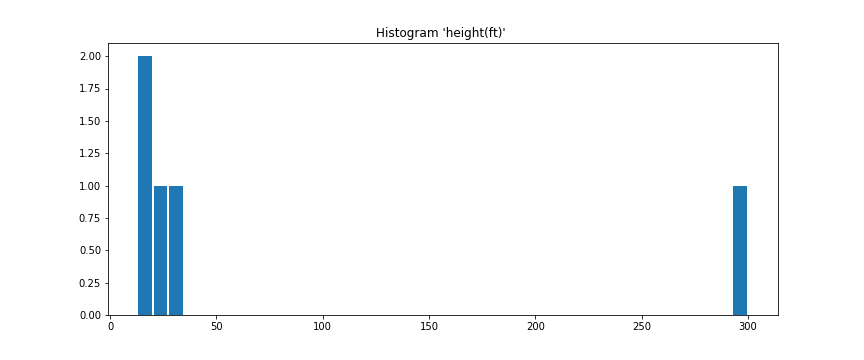
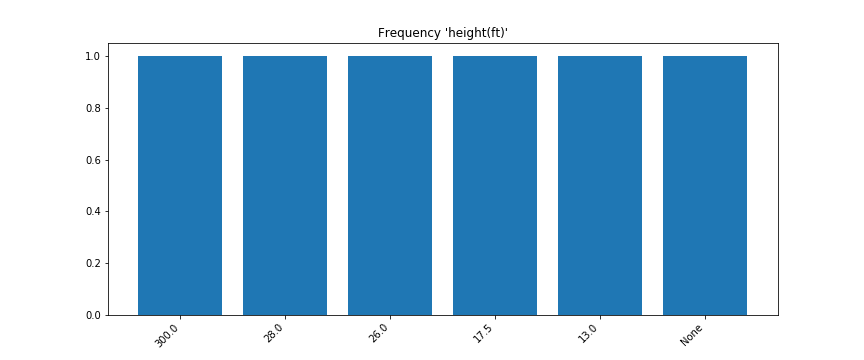

INFO:optimus:run() executed in 13.69 sec


In [30]:
op.profiler.run(df, "height(ft)", infer=True)

## Apply (a function)

In [31]:
def func(value, args):
    return value + 100


df.cols.apply("height(ft)", func, "float").cols.mean("height(ft)")

INFO:optimus:Using 'pandas_udf' to process column 'height(ft)' with function func


176.9

## Histogramming

In [32]:
df.cols.count_uniques("*")

{'names': 6,
 'height(ft)': 5,
 'function': 6,
 'rank': 3,
 'weight(t)': 5,
 'japanese name': 6,
 'last position': 4,
 'attributes': 6}

## String Methods

In [33]:
df \
    .cols.lower("names") \
    .cols.upper("function").table()

INFO:optimus:Using 'column_exp' to process column 'names' with function _lower
INFO:optimus:Using 'column_exp' to process column 'function' with function _upper


names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable
optimus,28.0,LEADER,10,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111","[8.53439998626709,⋅4300.0]"
metroplex,300.0,BATTLE⋅STATION,8,None,['Metroflex'],None,"[91.44000244140625,⋅None]"
jazz,13.0,FIRST⋅LIEUTENANT,8,1.7999999523162842,['Meister'],"33.670666,-117.841553","[3.962399959564209,⋅1800.0]"
ironhide,26.0,SECURITY,7,4.0,['Roadbuster'],"37.789563,-122.400356","[7.924799919128418,⋅4000.0]"
bumblebee,17.5,ESPIONAGE,7,2.0,"['Bumble',⋅'Goldback']","10.642707,-71.612534","[5.334000110626221,⋅2000.0]"
megatron,None,NONE,None,5.699999809265137,['Megatron'],None,"[None,⋅5700.0]"


## Merge  
  
### Concat  
Optimus provides an intuitive way to concat Dataframes by columns or rows.

In [34]:
df_new = op.create.df(
    [
        "class"
    ],
    [
        ("Autobot"),
        ("Autobot"),
        ("Autobot"),
        ("Autobot"),
        ("Decepticons"),

    ]).h_repartition(1)

op.append([df, df_new], "columns").table()

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable,class 9 (string) nullable
metroplex,300.0,battle⋅station,8,None,['Metroflex'],None,"[91.44000244140625,⋅None]",None
optimus,28.0,leader,10,4.300000190734863,"['Inochi',⋅'Convoy']","19.442735,-99.201111","[8.53439998626709,⋅4300.0]",Autobot
bumblebee,17.5,espionage,7,2.0,"['Bumble',⋅'Goldback']","10.642707,-71.612534","[5.334000110626221,⋅2000.0]",None
None,None,None,None,None,None,None,None,Autobot
None,None,None,None,None,None,None,None,Autobot
megatron,None,none,None,5.699999809265137,['Megatron'],None,"[None,⋅5700.0]",None
ironhide,26.0,security,7,4.0,['Roadbuster'],"37.789563,-122.400356","[7.924799919128418,⋅4000.0]",None
None,None,None,None,None,None,None,None,Autobot
None,None,None,None,None,None,None,None,Decepticons
jazz,13.0,first⋅lieutenant,8,1.7999999523162842,['Meister'],"33.670666,-117.841553","[3.962399959564209,⋅1800.0]",None


Operations like `join` and `group` are handle using Spark directly

In [35]:
df_melt.pivot("names", "variable", "value").table()

NameError: name 'df_melt' is not defined

# Plotting

INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _bucketizer
INFO:optimus:bucketizer() executed in 0.21 sec
INFO:optimus:hist() executed in 0.84 sec
INFO:optimus:hist() executed in 1.25 sec


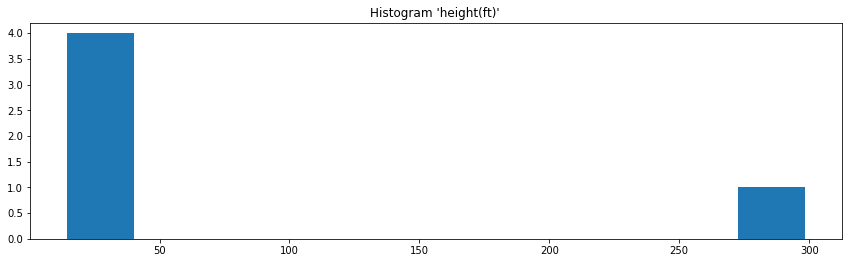

In [36]:
df.plot.hist("height(ft)", 10)

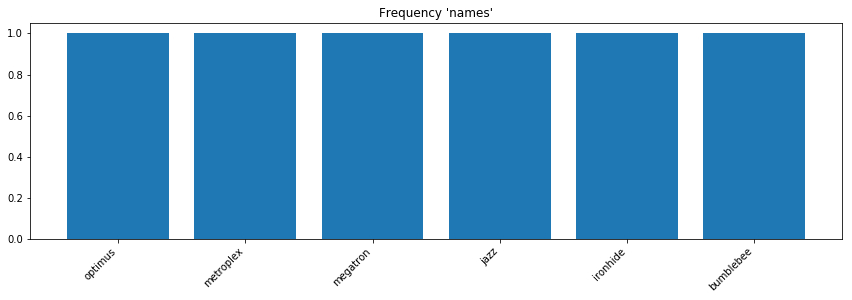

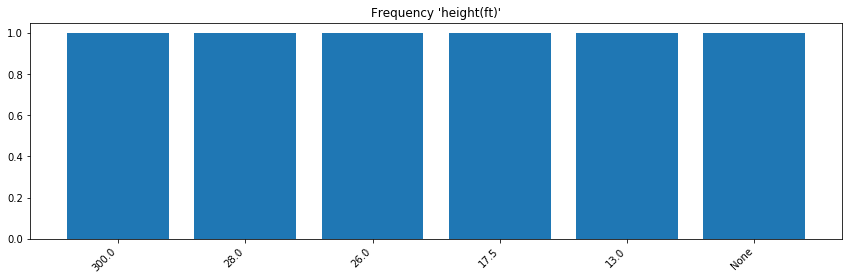

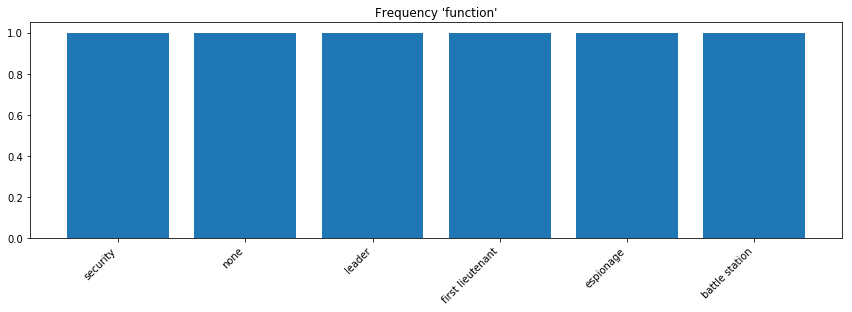

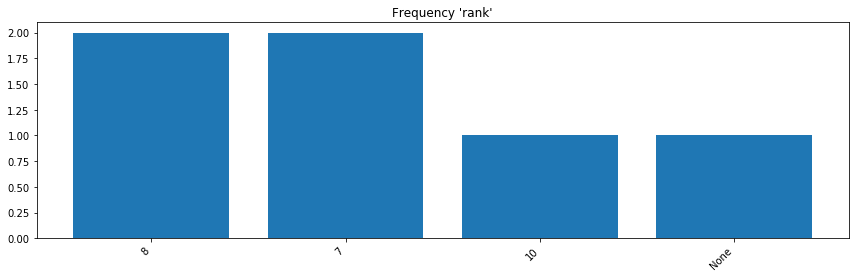

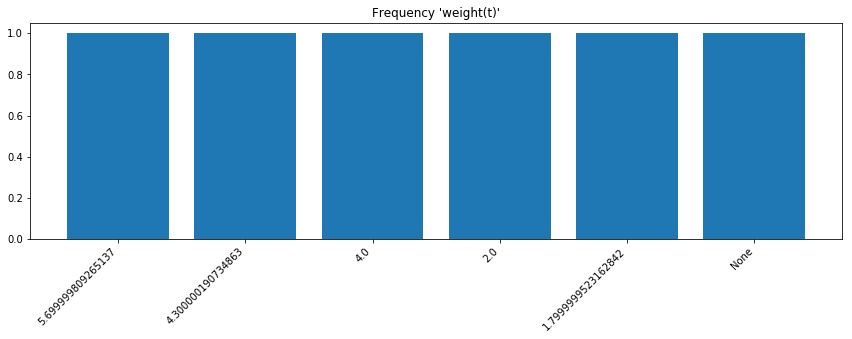

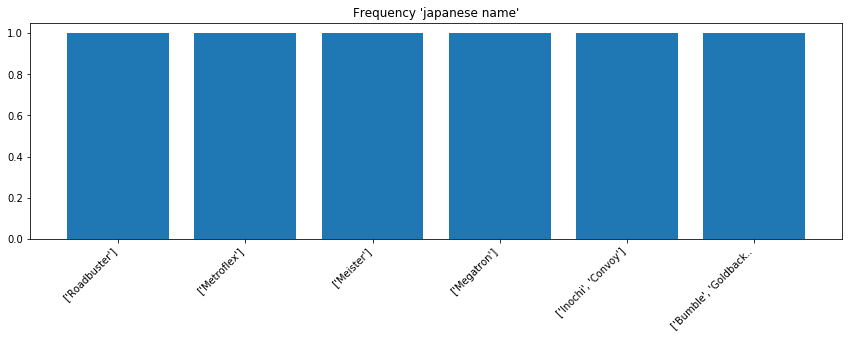

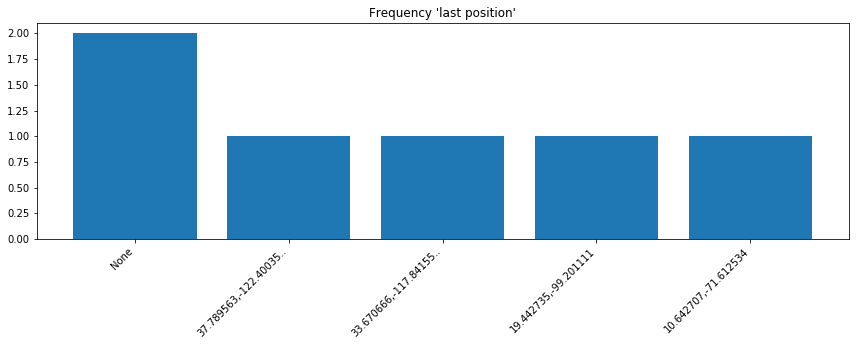

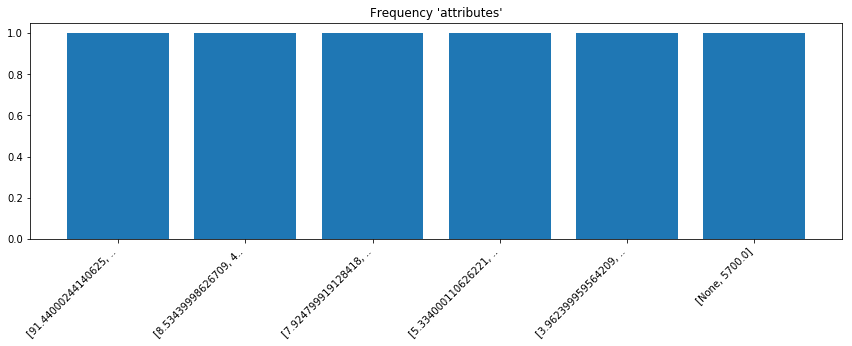

In [37]:
df.plot.frequency("*", 10)